<a href="https://colab.research.google.com/github/jillianhaig/Project2_DS4002/blob/main/SCRIPTS/data_creation_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/jillianhaig/Project2_DS4002 # so we can access data loaded from shared github


Cloning into 'Project2_DS4002'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 32 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 726.27 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/Project2_DS4002/DATA/hurr.atl.days.csv')

In [4]:
df.rename(columns={'  Number of days with hurricane in Atlantic  missing value -99 https://psl.noaa.gov/data/timeseries/month/': 'hurricane_days'}, inplace=True)

In [5]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['Date'])

# Filter the data to start from 1970
df_filtered = df[df['date'] >= '1970-01-01']

# Extract the year from the date column
df_filtered['year'] = df_filtered['date'].dt.year

# Group by year and sum the number of hurricane days
yearly_data = df_filtered.groupby('year')['hurricane_days'].sum().reset_index()

# Rename the columns for clarity
yearly_data.columns = ['Year', 'Hurricane_Days']

# Display the resulting yearly data
print(yearly_data)

    Year  Hurricane_Days
0   1970           13.25
1   1971           28.75
2   1972            6.25
3   1973           10.00
4   1974           14.25
5   1975           20.50
6   1976           25.50
7   1977            6.75
8   1978           13.50
9   1979           21.75
10  1980           38.25
11  1981           22.50
12  1982            5.75
13  1983            3.50
14  1984           18.25
15  1985           21.25
16  1986           10.50
17  1987            5.00
18  1988           21.25
19  1989           31.75
20  1990           26.75
21  1991            8.25
22  1992           16.00
23  1993            9.50
24  1994            7.25
25  1995           60.25
26  1996           45.00
27  1997            9.50
28  1998           48.50
29  1999           41.00
30  2000           32.75
31  2001           25.50
32  2002           10.75
33  2003           32.75
34  2004           45.50
35  2005           49.75
36  2006           21.25
37  2007           12.25
38  2008           30.50


<ipython-input-5-203050a7aa3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['date'].dt.year


<Axes: xlabel='Year', ylabel='Hurricane_Days'>

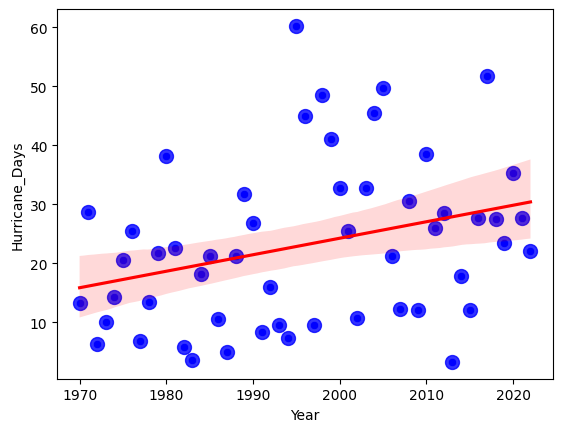

In [6]:
sns.scatterplot(data=yearly_data, x='Year', y='Hurricane_Days', color='blue')
sns.regplot(data=yearly_data, x='Year', y='Hurricane_Days',
            scatter_kws={'color': 'blue', 's': 100},
            line_kws={'color': 'red'})

In [7]:
df2 = pd.read_csv('/content/Project2_DS4002/DATA/annual-co2-emissions-per-country.csv')

In [8]:
df2 = df2[(df2['Entity'] == 'World') & (df2['Year'] >= 1970)]

In [9]:
df2.drop(columns=['Code'], inplace=True)

In [10]:
df2.rename(columns={'Annual CO₂ emissions': 'CO2_emissions'}, inplace=True)

In [11]:
merged_df = pd.merge(yearly_data, df2, on='Year')


In [12]:
merged_df = merged_df.drop(columns=['Entity'])

In [13]:
merged_df.rename(columns={'Hurricane_Days': 'Atlantic_Hurricane_Days'}, inplace=True)

In [14]:
merged_df

,Year,Atlantic_Hurricane_Days,CO2_emissions
0,1970,13.25,1.489816e+10
1,1971,28.75,1.550279e+10
2,1972,6.25,1.622344e+10
3,1973,10.00,1.708350e+10
4,1974,14.25,1.700938e+10
5,1975,20.50,1.704998e+10
6,1976,25.50,1.798524e+10
7,1977,6.75,1.849465e+10
8,1978,13.50,1.906396e+10
9,1979,21.75,1.960300e+10


In [15]:
df3 = pd.read_csv('/content/Project2_DS4002/DATA/hurr.nepac.days.csv')

In [16]:
column_names = df3.columns.tolist()

print(column_names)

['Date', '  NE Pacific Hurricane days/month  missing value -99 https://psl.noaa.gov/data/timeseries/month/']


In [17]:
df3.rename(columns={'  NE Pacific Hurricane days/month  missing value -99 https://psl.noaa.gov/data/timeseries/month/': 'Pacific_Hurricane_Days'}, inplace=True)

In [18]:
df3.head()

,Date,Pacific_Hurricane_Days
0,1971-01-01,0.00
1,1971-02-01,0.00
2,1971-03-01,0.00
3,1971-04-01,0.00
4,1971-05-01,2.25


In [19]:
df3['Date'] = pd.to_datetime(df3['Date'])

# Filter the DataFrame to only include data from 1971 onwards
df_filtered2 = df3[df3['Date'] >= '1971-01-01']

# Extract the year from the Date
df_filtered2['Year'] = df_filtered2['Date'].dt.year

# Group by Year and calculate the average
yearly_avg2 = df_filtered2.groupby('Year')['Pacific_Hurricane_Days'].sum().reset_index()

# Rename the columns for clarity
yearly_avg2.columns = ['Year', 'Pacific_Hurricane_Days']
df_3 = yearly_avg2

# Display the resulting yearly data
print(df_3)

    Year  Pacific_Hurricane_Days
0   1971                   38.50
1   1972                   33.75
2   1973                   28.50
3   1974                   22.75
4   1975                   26.75
5   1976                   27.25
6   1977                    5.25
7   1978                   51.50
8   1979                   13.75
9   1980                   22.75
10  1981                   18.25
11  1982                   39.25
12  1983                   47.75
13  1984                   46.25
14  1985                   49.75
15  1986                   28.75
16  1987                   29.50
17  1988                   29.50
18  1989                   27.25
19  1990                   58.25
20  1991                   44.00
21  1992                   65.50
22  1993                   50.75
23  1994                   33.00
24  1995                   22.25
25  1996                   13.00
26  1997                   33.50
27  1998                   33.00
28  1999                   23.50
29  2000  

<Axes: xlabel='Year', ylabel='Pacific_Hurricane_Days'>

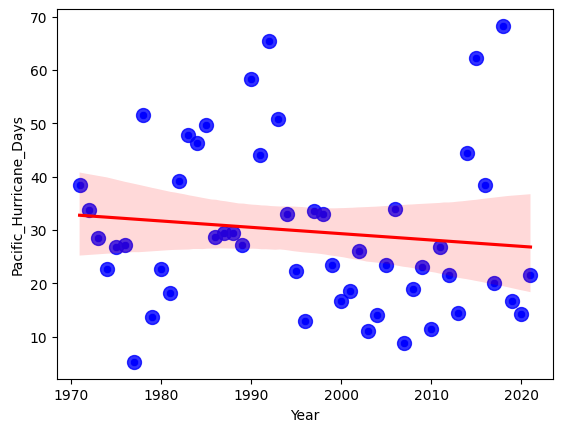

In [20]:
sns.scatterplot(data=df_3, x='Year', y='Pacific_Hurricane_Days', color='blue')
sns.regplot(data=df_3, x='Year', y='Pacific_Hurricane_Days',
            scatter_kws={'color': 'blue', 's': 100},
            line_kws={'color': 'red'})

In [21]:
merged_df2 = pd.merge(merged_df, df_3, on='Year')


In [22]:
merged_df2['Total_Hurricane_Days'] = merged_df2['Pacific_Hurricane_Days'] + merged_df2['Atlantic_Hurricane_Days']

In [23]:
merged_df2

,Year,Atlantic_Hurricane_Days,CO2_emissions,Pacific_Hurricane_Days,Total_Hurricane_Days
0,1971,28.75,1.550279e+10,38.50,67.25
1,1972,6.25,1.622344e+10,33.75,40.00
2,1973,10.00,1.708350e+10,28.50,38.50
3,1974,14.25,1.700938e+10,22.75,37.00
4,1975,20.50,1.704998e+10,26.75,47.25
5,1976,25.50,1.798524e+10,27.25,52.75
6,1977,6.75,1.849465e+10,5.25,12.00
7,1978,13.50,1.906396e+10,51.50,65.00
8,1979,21.75,1.960300e+10,13.75,35.50
9,1980,38.25,1.948244e+10,22.75,61.00


<Axes: xlabel='Year', ylabel='Total_Hurricane_Days'>

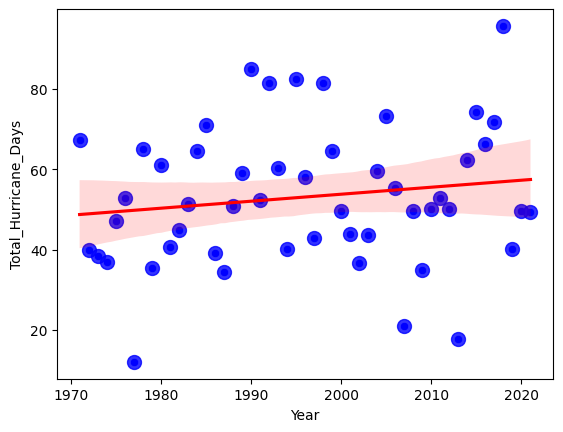

In [24]:
sns.scatterplot(data=merged_df2, x='Year', y='Total_Hurricane_Days', color='blue')
sns.regplot(data=merged_df2, x='Year', y='Total_Hurricane_Days',
            scatter_kws={'color': 'blue', 's': 100},
            line_kws={'color': 'red'})

In [25]:
df_pop = pd.read_csv('/content/Project2_DS4002/DATA/population (1).csv')

In [27]:
df_pop.rename(columns={'Population (historical)': 'Population'}, inplace=True)

In [29]:
df_pop.drop(columns=['Code'], inplace=True)

In [30]:
df_pop.head()

,Entity,Year,Population
0,Afghanistan,-10000,14737
1,Afghanistan,-9000,20405
2,Afghanistan,-8000,28253
3,Afghanistan,-7000,39120
4,Afghanistan,-6000,54166


In [31]:
population_df = df_pop[(df_pop['Entity'] == 'World') & (df_pop['Year'] >= 1971) & (df_pop['Year'] <= 2021)]

In [34]:
population_df.drop(columns=['Entity'], inplace=True)

<ipython-input-34-08f82a0f6a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df.drop(columns=['Entity'], inplace=True)


In [36]:
merged_df3 = pd.merge(merged_df2, population_df, on='Year')

In [37]:
merged_df3

,Year,Atlantic_Hurricane_Days,CO2_emissions,Pacific_Hurricane_Days,Total_Hurricane_Days,Population
0,1971,28.75,1.550279e+10,38.50,67.25,3769847834
1,1972,6.25,1.622344e+10,33.75,40.00,3844917687
2,1973,10.00,1.708350e+10,28.50,38.50,3920805030
3,1974,14.25,1.700938e+10,22.75,37.00,3996416108
4,1975,20.50,1.704998e+10,26.75,47.25,4070735264
5,1976,25.50,1.798524e+10,27.25,52.75,4144246391
6,1977,6.75,1.849465e+10,5.25,12.00,4217863819
7,1978,13.50,1.906396e+10,51.50,65.00,4292097508
8,1979,21.75,1.960300e+10,13.75,35.50,4368539472
9,1980,38.25,1.948244e+10,22.75,61.00,4447606208
